## 4 Geocentric Models

In [361]:
%pprint # turn on/off pprint

import os

import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import jax.numpy as jnp
from jax import vmap

import numpyro
import numpyro.distributions as dist

import reth2


if "SVG" in os.environ:
    %config InlineBackend.figure_formats = ["svg"]
az.style.use("arviz-darkgrid")

Pretty printing has been turned OFF


<module 'reth2' from '/home/nbooks/stats-rethinking2/reth2.py'>

In [32]:
import matplotlib.colors
#matplotlib.colors.get_named_colors_mapping()

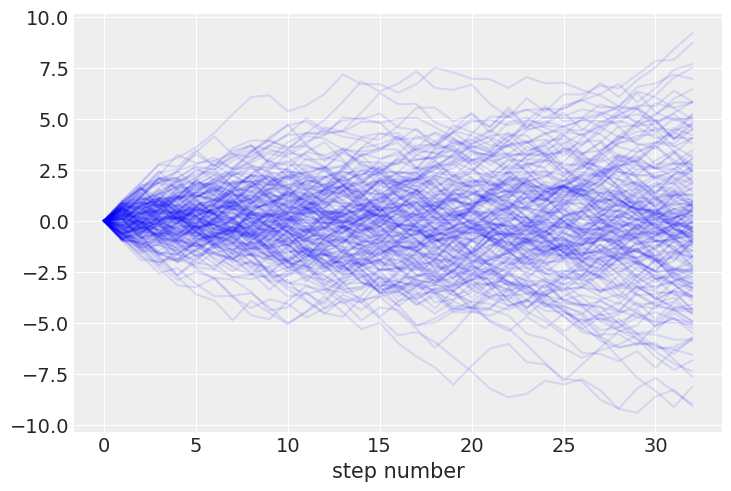

In [168]:
# Image 4.1 Normal simu by addition
player_cnt = 500
pos_cnt = 32
#pos = reth2.r_sample(dist.Bernoulli(probs=0.5), (player_cnt,pos_cnt)); pos = (pos * 2 - 1) # simulate step left -1, right +1
pos = reth2.r_sample(dist.Uniform(-1, 1), (player_cnt, pos_cnt))

pos = pos.tolist() # make it mutable, to edit in-place
for i in range(player_cnt):
    pos[i].insert(0, 0)
    for j in range(1, len(pos[i])): pos[i][j] += pos[i][j-1]

pos = jnp.array(pos) # back, jax array

for i in range(len(player)):
    plt.plot(pos[i], 'b-', alpha=0.1)
plt.xlabel('step number')
plt.show()


In [117]:
#az.plot_posterior(np.random.randn(100_000));

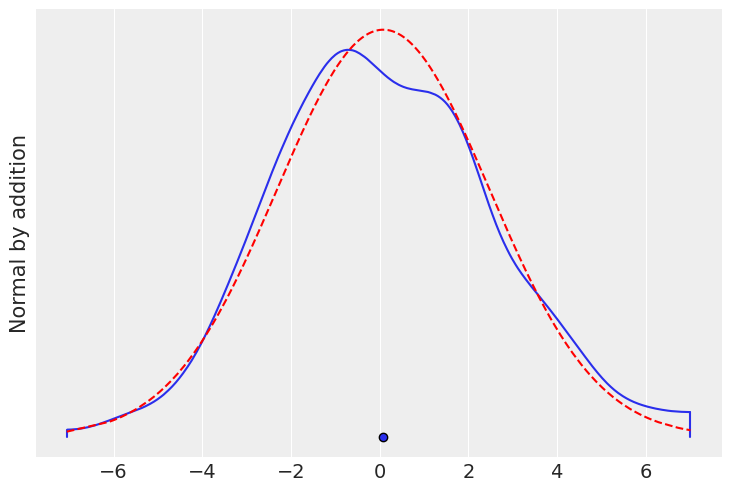

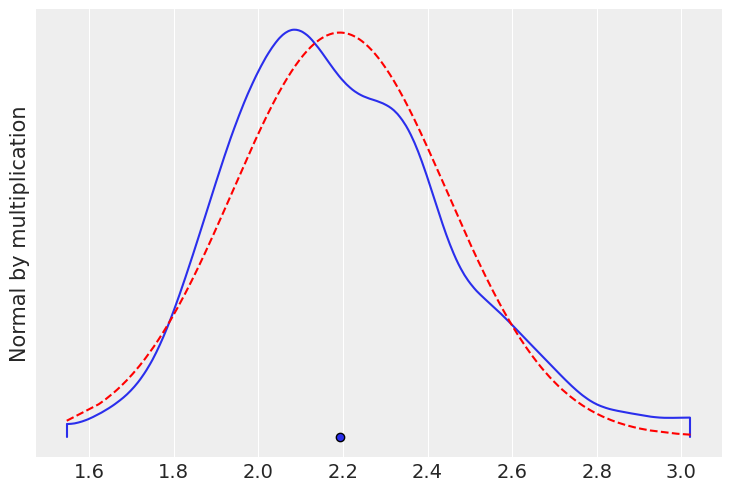

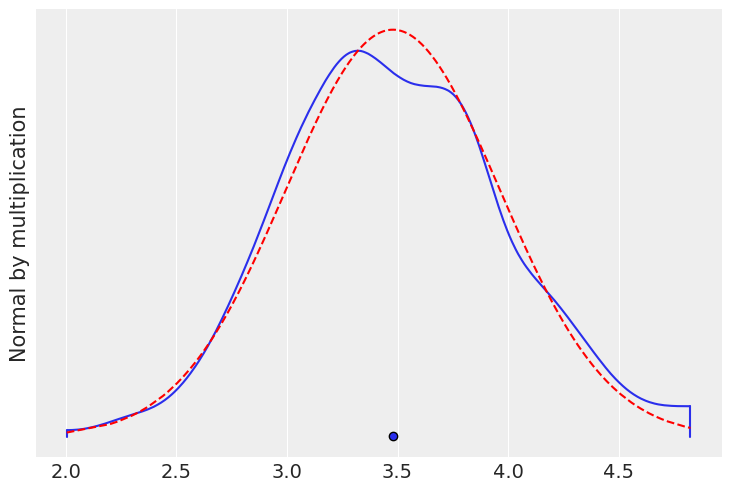

In [190]:
# Code 4.1 Normal by addition
growth = jnp.sum(reth2.r_sample(dist.Uniform(-1, 1), (1000, 16)), -1)
az.plot_density({"": growth}, hdi_prob=1)
x = jnp.sort(growth)
plt.plot(x, reth2.PDF(dist.Normal(jnp.mean(x), jnp.std(x)), x), "r--")
plt.ylabel("Normal by addition")
plt.show()

# Code 4.2 Normal by multiplication
growth = jnp.prod(1 + reth2.r_sample(dist.Uniform(0, 0.1), (1000, 16)), -1)
az.plot_density({"": growth}, hdi_prob=1)
x = jnp.sort(growth)
plt.plot(x, reth2.PDF(dist.Normal(jnp.mean(x), jnp.std(x)), x), "r--")
plt.ylabel("Normal by multiplication")
plt.show()

# Code 4.5 Normal by log-multiplication
growth = jnp.log( jnp.prod(1 + reth2.r_sample(dist.Uniform(0, 0.5), (1000, 16)), -1) )
az.plot_density({"": growth}, hdi_prob=1)
x = jnp.sort(growth)
plt.plot(x, reth2.PDF(dist.Normal(jnp.mean(x), jnp.std(x)), x), "r--")
plt.ylabel("Normal by multiplication")
plt.show()



#help(jnp.sum)

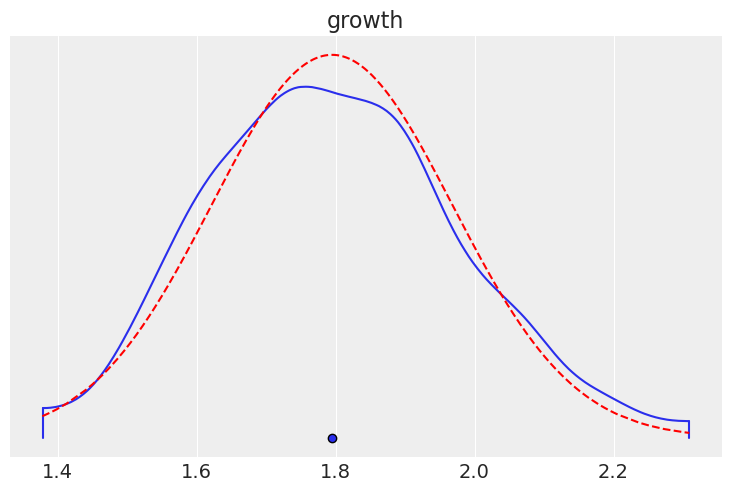

In [181]:
# Code 4.2 Normal by multiplication
growth = jnp.prod(1 + reth2.r_sample(dist.Uniform(0, 0.1), (1000, 12)), -1)
az.plot_density({"growth": growth}, hdi_prob=1)

x = jnp.sort(growth)
plt.plot(x, reth2.PDF(dist.Normal(jnp.mean(x), jnp.std(x)), x), "r--")
plt.show()

In [196]:
# Using Gaussian(Normal) distributions
# ontological/ontologie - Objective existence of things in reality / teorie a existenței, existență obiectivă a lucrurilor din realitate [gr. on – ființă, logos – studiu]
# epistemological/epistemologie -theory of scientific knowledge / teorie a cunoașterii științifice [gr. episteme – știință, logos – studiu]


In [205]:
# !(cd data && curl -O https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv)

In [212]:
# Code 4.7
Howell1 = pd.read_csv("./data/Howell1.csv", sep=";")
d = Howell1

# Code 4.8
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [213]:
# Code 4.9
reth2.precis(d)


                mean       std    median      5.5%     94.5%     n_eff     r_hat
       age     29.34     20.75     27.00      0.00     57.00    186.38      1.03
    height    138.26     27.60    148.59     90.81    170.18    218.68      1.06
      male      0.47      0.50      0.00      0.00      1.00    670.75      1.00
    weight     35.61     14.72     40.06     11.37     55.71    305.62      1.05



In [218]:
# Code 4.10
d.height


0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
539    145.415
540    162.560
541    156.210
542     71.120
543    158.750
Name: height, Length: 544, dtype: float64

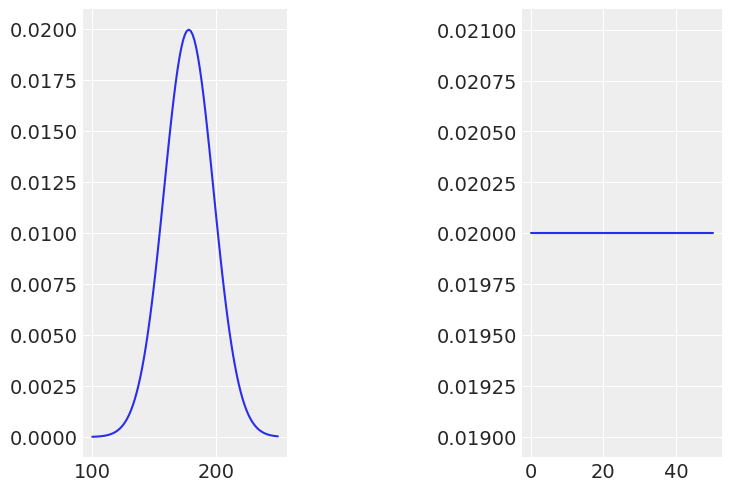

In [341]:
# Code 4.11
d2 = d[d.age >= 18]

# Code 4.12
plt.subplot(131)
x = jnp.linspace(100, 250, 101)
plt.plot(x, reth2.PDF(dist.Normal(178, 20), x))

# Code 4.13
plt.subplot(133)
x = jnp.linspace(0, 50, 101)
plt.plot(x, reth2.PDF(dist.Uniform(0, 50, validate_args=True), x))

plt.show()

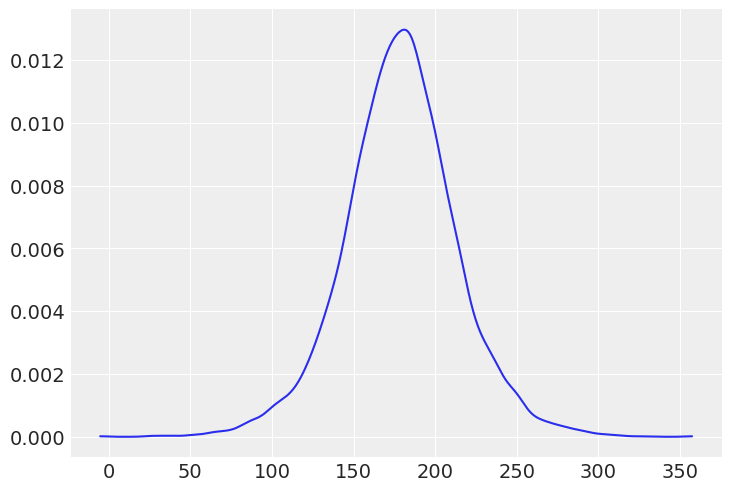

In [342]:
# Code 4.14
sample_mu = reth2.rnorm(178, 20, (10000,), r_seed=0)
sample_sigma = reth2.runif(0, 50, (10000,), r_seed=1)
prior_h = reth2.rnorm(sample_mu, sample_sigma, None, r_seed=2)
az.plot_kde(prior_h)
plt.show()

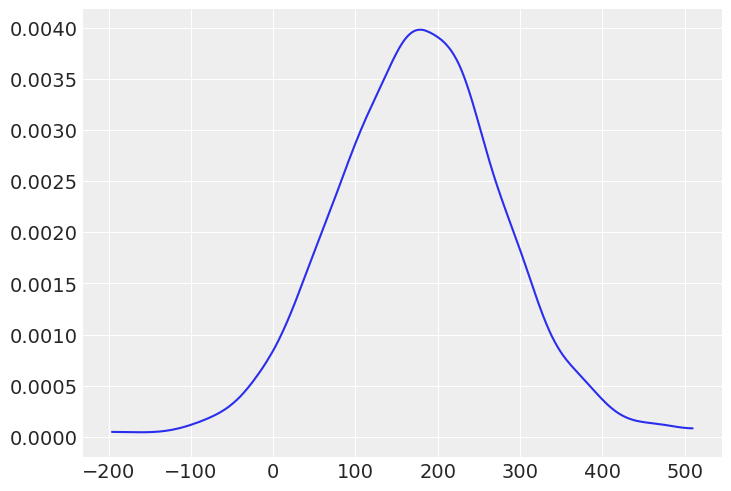

CDF(X in [0 None]) : 0.040000 (4.0%)


In [343]:
# Code 4.15
sample_mu = reth2.rnorm(178, 100, (1000,), r_seed=0)
sample_sigma = reth2.runif(0, 50, (1000,), r_seed=1)
prior_h = reth2.rnorm(sample_mu, sample_sigma, None, r_seed=2)[0]

az.plot_kde(prior_h)
plt.show()

_ = reth2.CDF(prior_h, (None, 0))

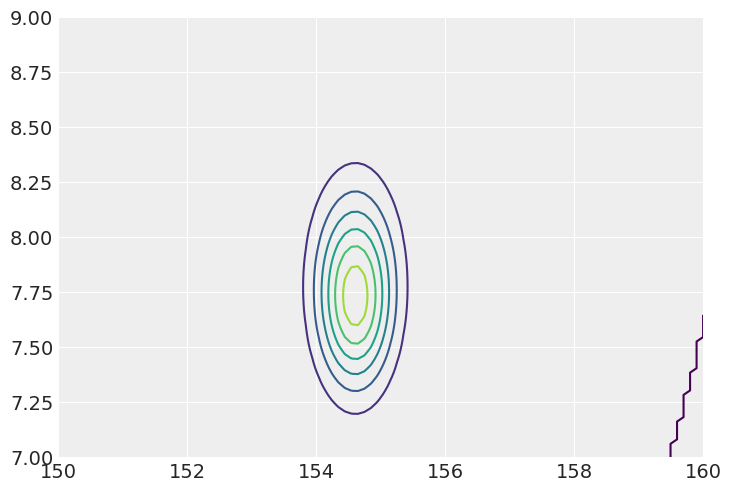

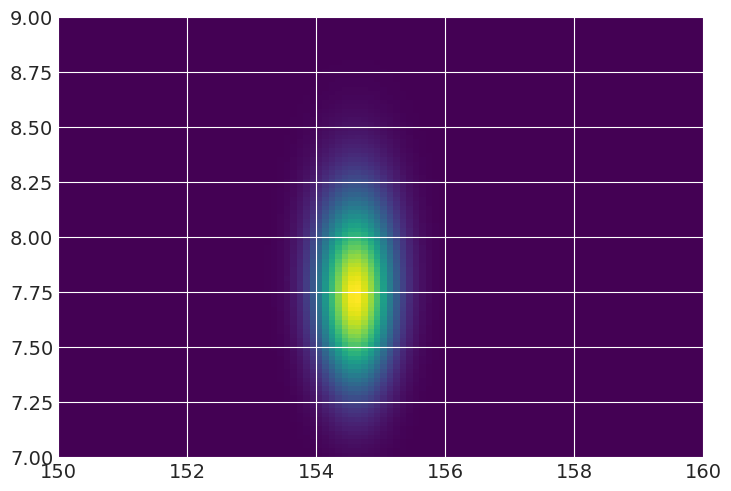

In [332]:
# Code 4.16
mu_list = jnp.linspace(start=150, stop=160, num=100)
sigma_list = jnp.linspace(start=7, stop=9, num=100)
mesh = jnp.meshgrid(mu_list, sigma_list)
post = {"mu": mesh[0].reshape(-1), "sigma": mesh[1].reshape(-1)}
post["LL"] = vmap(
    lambda mu, sigma: jnp.sum(dist.Normal(mu, sigma).log_prob(d2.height.values))
)(post["mu"], post["sigma"])
logprob_mu = dist.Normal(178, 20).log_prob(post["mu"])
logprob_sigma = dist.Uniform(0, 50).log_prob(post["sigma"])
post["prob"] = post["LL"] + logprob_mu + logprob_sigma
post["prob"] = jnp.exp(post["prob"] - jnp.max(post["prob"]))

# Code 4.17
plt.contour(
    post["mu"].reshape(100, 100),
    post["sigma"].reshape(100, 100),
    post["prob"].reshape(100, 100),
)
plt.show()

# Code 4.18
plt.imshow(
    post["prob"].reshape(100, 100),
    origin="lower",
    extent=(150, 160, 7, 9),
    aspect="auto",
)
plt.show()

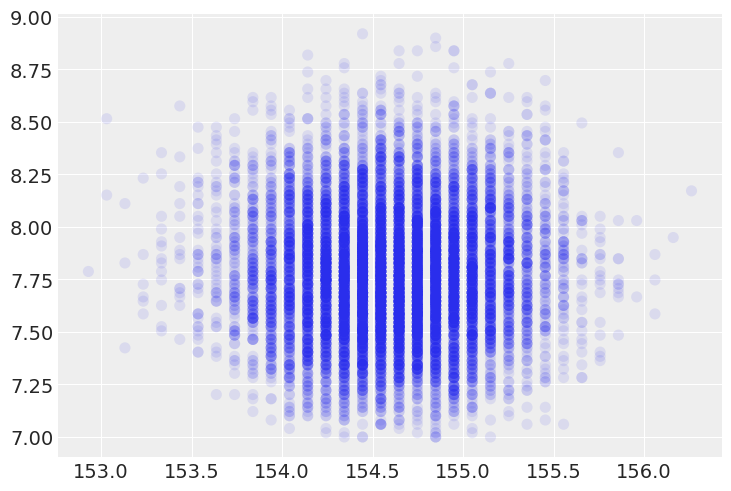

In [335]:
# Code 4.19
prob = reth2.standardize( post["prob"] )
sample_rows = reth2.r_sample( dist.Categorical(probs=prob), (int(1e4),), r_seed=0)
sample_mu = post["mu"][sample_rows]
sample_sigma = post["sigma"][sample_rows]

# Code 4.20
plt.scatter(sample_mu, sample_sigma, s=64, alpha=0.1, edgecolor="none")
plt.show()

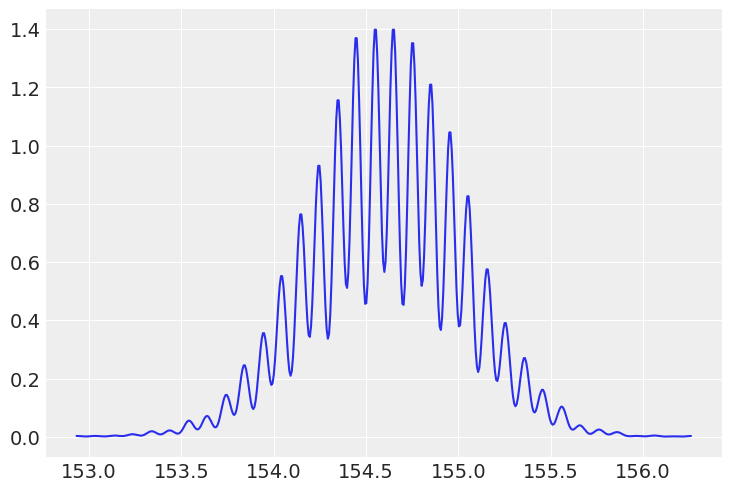

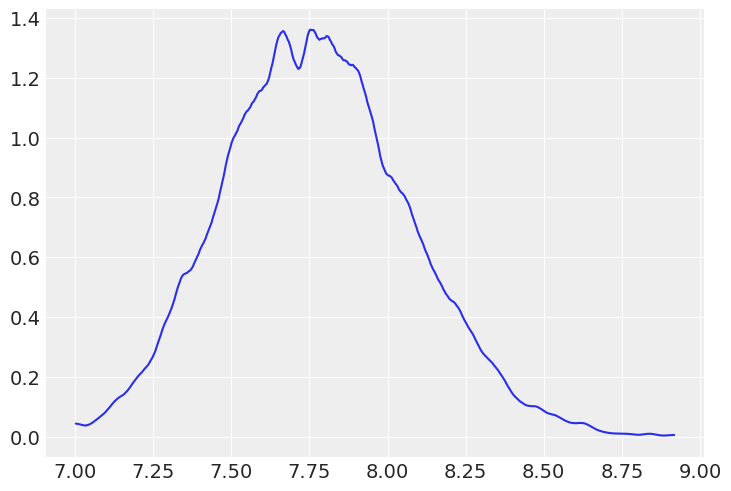

In [339]:
# Code 4.21
az.plot_kde(sample_mu)
plt.show()

az.plot_kde(sample_sigma)
plt.show()

In [340]:
# Code 4.22
_ = reth2.HPDI(sample_mu, 0.89)
_ = reth2.HPDI(sample_sigma, 0.89)

HDPI(0.890000) : [153.939392 155.151520]
HDPI(0.890000) : [7.303030 8.232323]


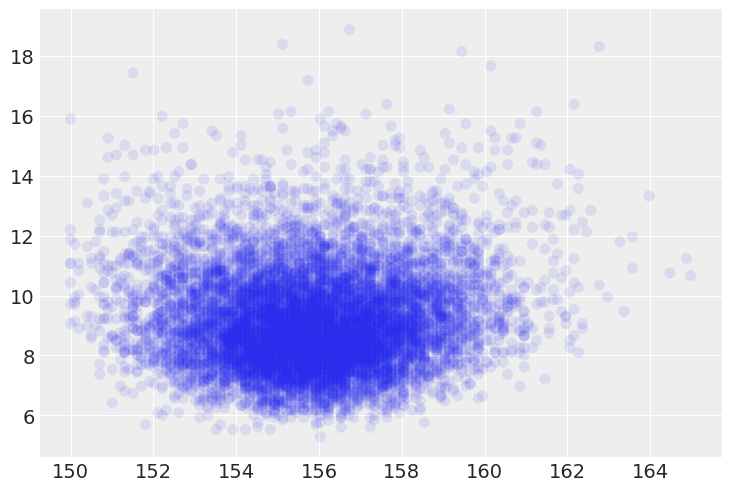

In [348]:
# Code 4.23
d3 = d2.height.sample(n=20)

# Code 4.24
mu_list = jnp.linspace(start=150, stop=170, num=200)
sigma_list = jnp.linspace(start=4, stop=20, num=200)
mesh = jnp.meshgrid(mu_list, sigma_list)
post2 = {"mu": mesh[0].reshape(-1), "sigma": mesh[1].reshape(-1)}
post2["LL"] = vmap(
    lambda mu, sigma: jnp.sum(dist.Normal(mu, sigma).log_prob(d3.values))
)(post2["mu"], post2["sigma"])
logprob_mu = dist.Normal(178, 20).log_prob(post2["mu"])
logprob_sigma = dist.Uniform(0, 50).log_prob(post2["sigma"])
post2["prob"] = post2["LL"] + logprob_mu + logprob_sigma
post2["prob"] = jnp.exp(post2["prob"] - jnp.max(post2["prob"]))
prob = post2["prob"] / jnp.sum(post2["prob"])
sample2_rows = reth2.r_sample( dist.Categorical(probs=prob), (int(1e4),), rseed=0)
sample2_mu = post2["mu"][sample2_rows]
sample2_sigma = post2["sigma"][sample2_rows]
plt.scatter(sample2_mu, sample2_sigma, s=64, alpha=0.1, edgecolor="none")
plt.show()


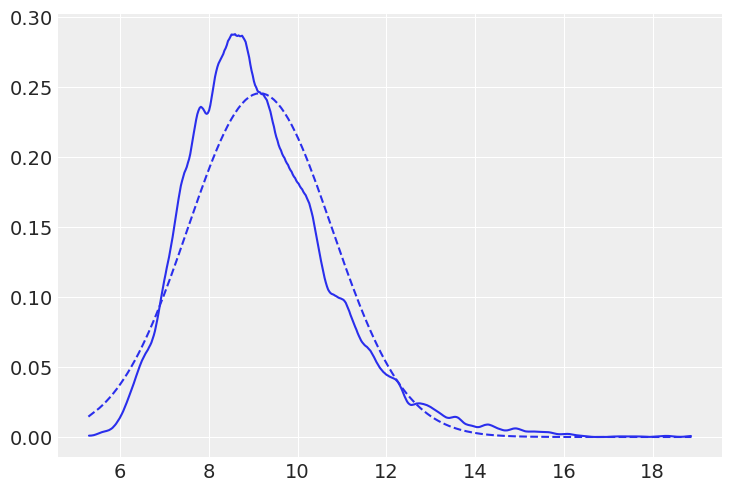

In [349]:
# Code 4.25
az.plot_kde(sample2_sigma)
x = jnp.sort(sample2_sigma)
plt.plot(x, jnp.exp(dist.Normal(jnp.mean(x), jnp.std(x)).log_prob(x)), "--")
plt.show()

## Finding the posterior distribution with quap

In [351]:
# Code 4.26
Howell1 = pd.read_csv("./data/Howell1.csv", sep=";")
d = Howell1
d2 = d[d["age"] >= 18]

In [371]:
# Code 4.27
def flist(height):
    mu = numpyro.sample("mu", dist.Normal(178, 20))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    numpyro.sample("height", dist.Normal(mu, sigma), obs=height)
    
# Code 4.28
m4_1, p4_1 = reth2.quap(flist, {'height': d2.height.values}, r_seed=0)

100%|██████████| 2000/2000 [00:00<00:00, 2234.28it/s, init loss: 4000.1155, avg. loss [1901-2000]: 1226.0389]


In [387]:
# Code 4.29
samples = m4_1.sample_posterior(reth2.rand(1), p4_1, (1000,))
reth2.precis(samples)


                mean       std    median      5.5%     94.5%     n_eff     r_hat
        mu    154.60      0.40    154.60    154.00    155.28    995.06      1.00
     sigma      7.76      0.30      7.76      7.33      8.26   1007.15      1.00



In [379]:
# Code 4.30
start = {"mu": d2.height.mean(), "sigma": d2.height.std()}
m4_1, p4_1 = reth2.quap(flist, {'height': d2.height.values}, r_seed=0, start=start)

100%|██████████| 2000/2000 [00:01<00:00, 1963.88it/s, init loss: 1226.0387, avg. loss [1901-2000]: 1226.0389]


In [385]:
# Code 4.31
def model(height):
    mu = numpyro.sample("mu", dist.Normal(178, 0.1))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    numpyro.sample("height", dist.Normal(mu, sigma), obs=height)
    
m4_2, p4_2 = reth2.quap(model, {'height': d2.height.values}, r_seed=0)

samples = m4_2.sample_posterior(reth2.rand(1), p4_2, (1000,))
reth2.precis(samples)

100%|██████████| 2000/2000 [00:00<00:00, 2175.04it/s, init loss: 1584193.6250, avg. loss [1901-2000]: 1626.5830]



                mean       std    median      5.5%     94.5%     n_eff     r_hat
        mu    177.86      0.10    177.86    177.72    178.03    995.05      1.00
     sigma     24.57      0.94     24.60     23.01     25.96   1012.88      1.00



In [392]:
# Code 4.32
samples = m4_1.sample_posterior(reth2.rand(1), p4_1, (1000,))
vcov = jnp.cov(jnp.stack(list(samples.values()), axis=0))
print("vcov   :", vcov)

# Code 4.33
print("diag   :", jnp.diagonal(vcov))
print("cov2cor:", vcov / jnp.sqrt(jnp.outer(jnp.diagonal(vcov), jnp.diagonal(vcov))))

vcov   : [[0.16249636 0.00168259]
 [0.00168259 0.08733706]]
diag   : [0.16249636 0.08733706]
cov2cor: [[1.         0.01412397]
 [0.01412397 1.        ]]


In [403]:
# Code 4.34
post = m4_1.sample_posterior(reth2.rand(1), p4_1, (int(1e4),))

reth2.pp( {latent: post[latent][:6].tolist() for latent in post} )

# Code 4.35
reth2.precis(post)

{ 'mu': [ 154.2420654296875,
          154.48318481445312,
          154.97694396972656,
          154.210205078125,
          155.4891815185547,
          154.8247833251953],
  'sigma': [ 7.5599565505981445,
             7.306346416473389,
             7.279916286468506,
             7.811490535736084,
             7.9049577713012695,
             7.978177070617676]}

                mean       std    median      5.5%     94.5%     n_eff     r_hat
        mu    154.61      0.41    154.61    153.93    155.25   9926.99      1.00
     sigma      7.75      0.29      7.74      7.28      8.22   9502.45      1.00



In [459]:
post = m4_1.sample_posterior(reth2.rand(1), p4_1, (int(1e4),))

# Code 4.36
samples_flat = jnp.stack(list(post.values()))
mu, sigma = jnp.mean(samples_flat, axis=1), jnp.cov(samples_flat)
#print(dict(mean=mu.tolist(), cov=sigma.tolist()))
samples4_1 = dist.MultivariateNormal(mu, sigma).sample(reth2.rand(0), (int(1e4),))
reth2.precis(samples4_1)


                mean       std    median      5.5%     94.5%     n_eff     r_hat
Param:0[0]    154.61      0.41    154.61    153.95    155.26  10111.40      1.00
Param:0[1]      7.74      0.29      7.75      7.29      8.22   9809.34      1.00



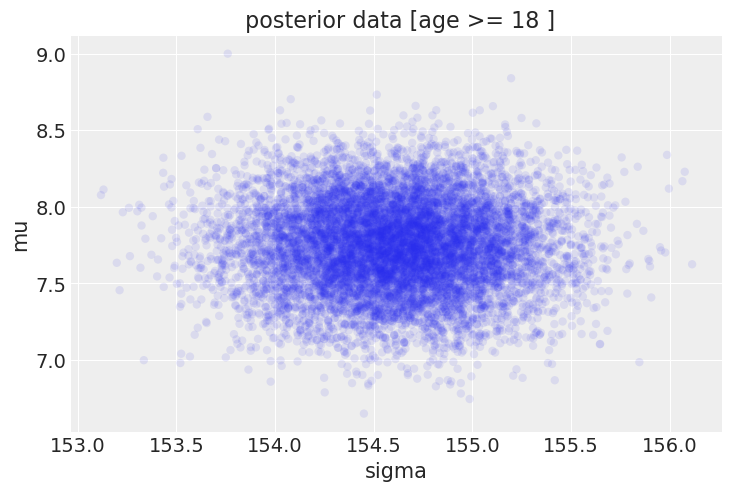

In [465]:
plt.title(" posterior data [age >= 18 ]")
plt.xlabel("sigma")
plt.ylabel("mu")
plt.scatter(samples4_1[:, 0], samples4_1[:, 1], alpha=0.1, edgecolor="none")
plt.show()

## 4.4 Linear prediction

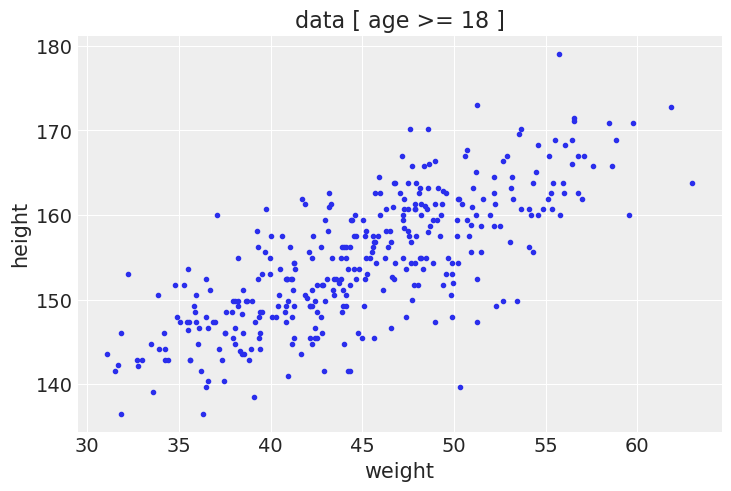

In [460]:
# Code 4.37
az.plot_pair(d2[["weight", "height"]].to_dict(orient="list"))
plt.title("data [ age >= 18 ]")
plt.show()

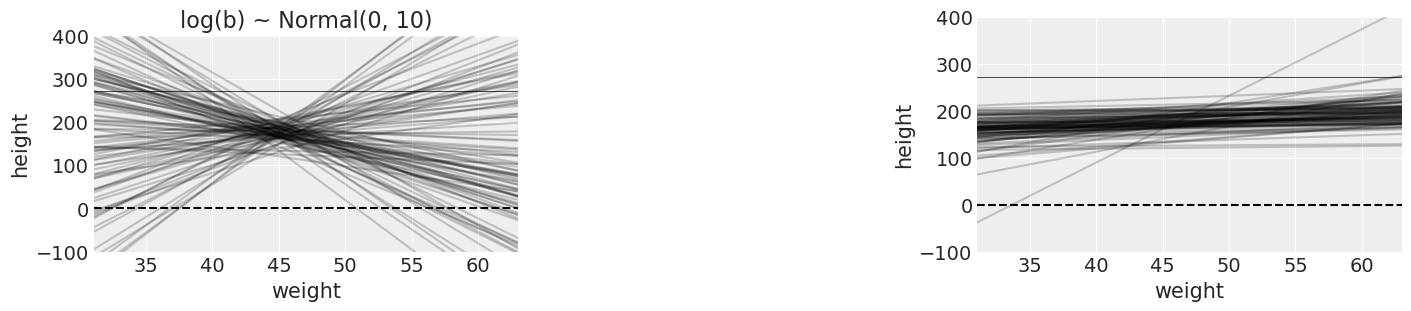

In [511]:
# Code 4.38 & 4.41
with numpyro.handlers.seed(rng_seed=2971):
    N = 100  # 100 lines
    a = numpyro.sample("a", dist.Normal(178, 20).expand([N]))
    b = numpyro.sample("b", dist.Normal(0, 10).expand([N]))
    log_b = numpyro.sample("b", dist.LogNormal(0, 1).expand([N]))
    
# Code 4.39 (generalized for both figures)
xbar = d2.weight.mean()
x = jnp.linspace(d2.weight.min(), d2.weight.max(), 101)

def figure4_5(figure, b):
    plt.subplot(
        figure,
        xlim=(d2.weight.min(), d2.weight.max()),
        ylim=(-100, 400),
        xlabel="weight",
        ylabel="height",
    )
    plt.axhline(y=0, c="k", ls="--")
    plt.axhline(y=272, c="k", ls="-", lw=0.5)

    for i in range(N):
        plt.plot(x, a[i] + b[i] * (x - xbar), "k", alpha=0.2)

plt.subplots(figsize=(14, 3))        
plt.title("b ~ Normal(0, 10)")
figure4_5(131, b)

plt.title("log(b) ~ Normal(0, 10)")
figure4_5(133, log_b)

plt.show()

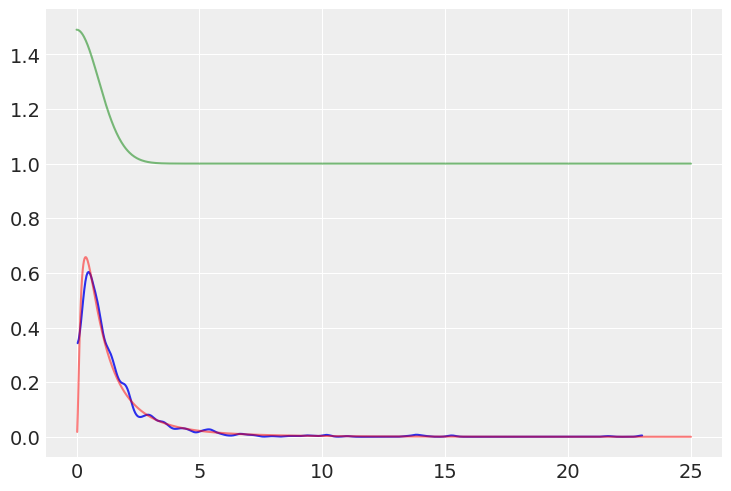

In [517]:
# Code 4.40
# sample lognormal(0,1)
az.plot_kde(reth2.r_sample(dist.LogNormal(0, 1), (1000,), r_seed=0))

# real lognormal(0, 1)
x = jnp.linspace(0, 25, 1000)
plt.plot(x, reth2.PDF(dist.LogNormal(0, 1), x), 'r', alpha=0.5)

# exp(normal(0, 1))
plt.plot(x, jnp.exp(reth2.PDF(dist.Normal(0, 1), x)), 'g', alpha=0.5)


In [514]:
# Code 4.42
# load data again, since it's a long way back
Howell1 = pd.read_csv("./data/Howell1.csv", sep=";")
d = Howell1
d2 = d[d["age"] >= 18]

# define the average weight, x-bar
xbar = d2.weight.mean()

# fit model
def model(weight, height):
    a = numpyro.sample("a", dist.Normal(178, 20))
    b = numpyro.sample("b", dist.LogNormal(0, 1))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    mu = numpyro.deterministic("mu", a + b * (weight - xbar))
    numpyro.sample("height", dist.Normal(mu, sigma), obs=height)
    
m4_3, p4_3 = reth2.quap(model, {'height': d2.height.values, 'weight': d2.weight.values}, r_seed=0)    

100%|██████████| 2000/2000 [00:01<00:00, 1629.54it/s, init loss: 40631.5391, avg. loss [1901-2000]: 1078.9297]


In [585]:
# Code 4.43
# log(b) ~ Norm | exp ==> exp(log(b)) ~ exp(Norm) ===> b ~ exp(Norm)=LogNorm
def model_b(weight, height):
    a = numpyro.sample("a", dist.Normal(178, 20))
    log_b = numpyro.sample("b", dist.Normal(0, 1))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    mu = numpyro.deterministic("mu", a + jnp.exp(log_b) * (weight - xbar))
    return numpyro.sample("height", dist.Normal(mu, sigma), obs=height)
    
m4_3b, p4_3b = reth2.quap(model_b, {'height': d2.height.values, 'weight': d2.weight.values}, r_seed=0)    

100%|██████████| 2000/2000 [00:01<00:00, 1812.40it/s, init loss: 40631.5391, avg. loss [1901-2000]: 1078.9297]


In [528]:
# Code 4.44
samples = m4_3.sample_posterior(reth2.rand(1), p4_3, (1000,))
samples.pop("mu")

reth2.precis(samples)

# Code 4.45
vcov = jnp.cov(jnp.stack(list(samples.values()), axis=0))
print("covariance=", jnp.round(vcov, 3))


                mean       std    median      5.5%     94.5%     n_eff     r_hat
         a    154.62      0.27    154.63    154.16    155.03    931.50      1.00
         b      0.91      0.04      0.90      0.84      0.97   1083.74      1.00
     sigma      5.08      0.19      5.08      4.79      5.41    949.65      1.00

covariance= [[0.075 0.    0.001]
 [0.    0.002 0.   ]
 [0.001 0.    0.038]]


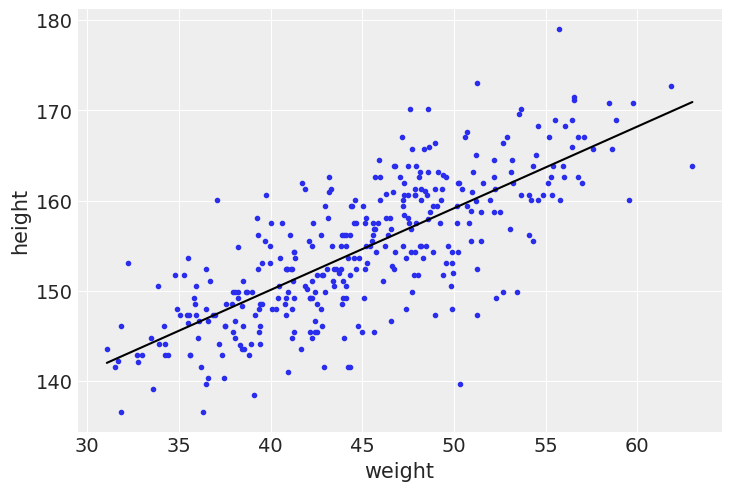

In [529]:
# Code 4.46
az.plot_pair(d2[["weight", "height"]].to_dict(orient="list"))
post = m4_3.sample_posterior(reth2.rand(1), p4_3, (1000,))
a_map = jnp.mean(post["a"])
b_map = jnp.mean(post["b"])
x = jnp.linspace(d2.weight.min(), d2.weight.max(), 101)
plt.plot(x, a_map + b_map * (x - xbar), "k")
plt.show()

In [583]:
# Code 4.47
post = m4_3.sample_posterior(reth2.rand(1), p4_3, (1000,))
reth2.pp( {latent + "-" + str(post[latent].shape): post[latent].reshape(-1)[:5].tolist() for latent in post} )

{ 'a-(1000,)': [ 154.36614990234375,
                 154.7851104736328,
                 154.73533630371094,
                 154.53842163085938,
                 154.53549194335938],
  'b-(1000,)': [ 0.9746450781822205,
                 0.8900049328804016,
                 0.8190221786499023,
                 0.8334105014801025,
                 1.0119179487228394],
  'mu-(1000, 352)': [ 157.12937927246094,
                      146.0771026611328,
                      141.57330322265625,
                      162.21343994140625,
                      150.74668884277344],
  'sigma-(1000,)': [ 4.97645902633667,
                     4.94352912902832,
                     5.282602310180664,
                     4.877720832824707,
                     4.894868850708008]}


100%|██████████| 2000/2000 [00:01<00:00, 1761.70it/s, init loss: 40631.5508, avg. loss [1901-2000]: 1078.9297]


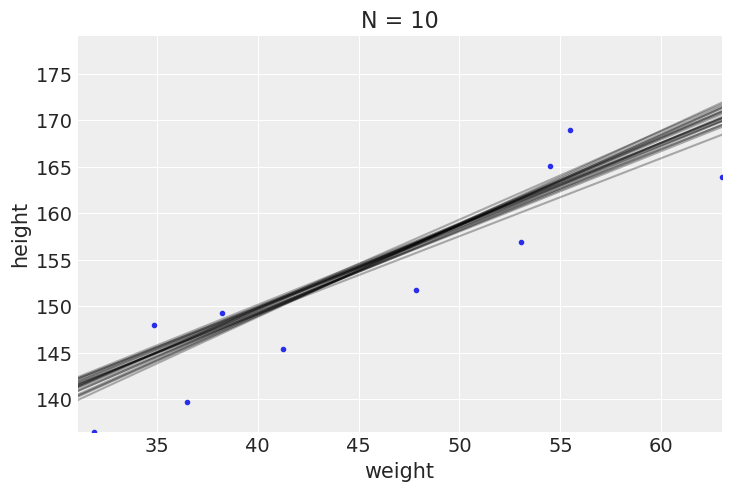

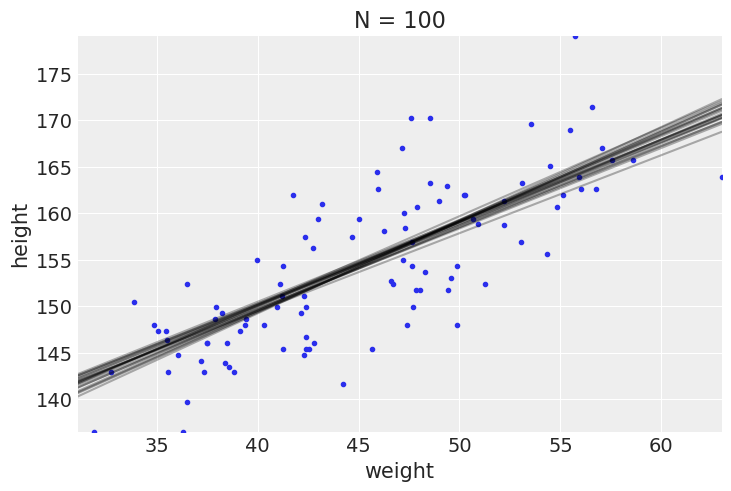

In [584]:
# Code 4.48 & 4.49
def code4_48(N):
    dN = d2[:N]

    def model(weight, height):
        a = numpyro.sample("a", dist.Normal(178, 20))
        b = numpyro.sample("b", dist.LogNormal(0, 1))
        sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
        mu = a + b * (weight - jnp.mean(weight))
        return numpyro.sample("height", dist.Normal(mu, sigma), obs=height)
    
    mN, pN = reth2.quap(model, {'height': d2.height.values, 'weight': d2.weight.values}, r_seed=0)    


    # Code 4.49
    # extract 20 samples from the posterior
    post = mN.sample_posterior(reth2.rand(1), pN, (20,))

    # display raw data and sample size
    ax = az.plot_pair(dN[["weight", "height"]].to_dict(orient="list"))
    ax.set(
        xlim=(d2.weight.min(), d2.weight.max()),
        ylim=(d2.height.min(), d2.height.max()),
        title="N = {}".format(N),
    )

    # plot the lines, with transparency
    x = jnp.linspace(d2.weight.min(), d2.weight.max(), 101)
    for i in range(20):
        plt.plot(x, post["a"][i] + post["b"][i] * (x - dN.weight.mean()), "k", alpha=0.3)
        
code4_48( 10)
code4_48(100)


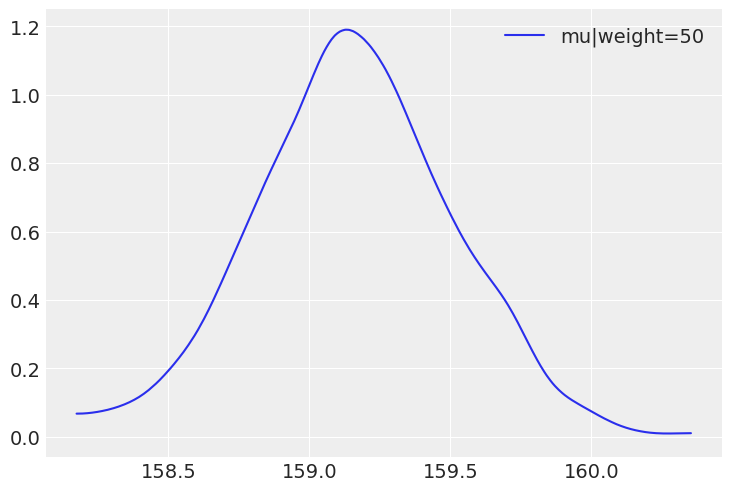

PI(89) : [158.595703 159.714447]


In [560]:
# Code 4.50 & 4.51
post = m4_3.sample_posterior(reth2.rand(1), p4_3, (1000,))
mu_at_50 = post["a"] + post["b"] * (50 - xbar)

az.plot_kde(mu_at_50, label="mu|weight=50")
plt.show()

# Code 4.52
_ = reth2.PI(mu_at_50, 89)

In [589]:
# Code 4.53
mu = reth2.Predictive(m4_3.model, post, return_sites=["mu"])(reth2.rand(2), d2.weight.values, None)["mu"]
mu.shape, mu[:5, 0].tolist()

((1000, 352), [157.12937927246094, 157.30838012695312, 157.05735778808594, 156.9012451171875, 157.40440368652344])

In [574]:
# Code 4.54
# define sequence of weights to compute predictions for these values will be on the horizontal axis
weight_seq = jnp.arange(start=25, stop=71, step=1)

# use predictive to compute mu for each sample from posterior and for each weight in weight_seq
mu = reth2.Predictive(m4_3.model, post, return_sites=["mu"])(reth2.rand(2), weight_seq, None)["mu"]
mu.shape, mu[:5, 0].tolist()

((1000, 46), [134.8825225830078, 136.9934844970703, 138.36268615722656, 137.87814331054688, 134.3067626953125])

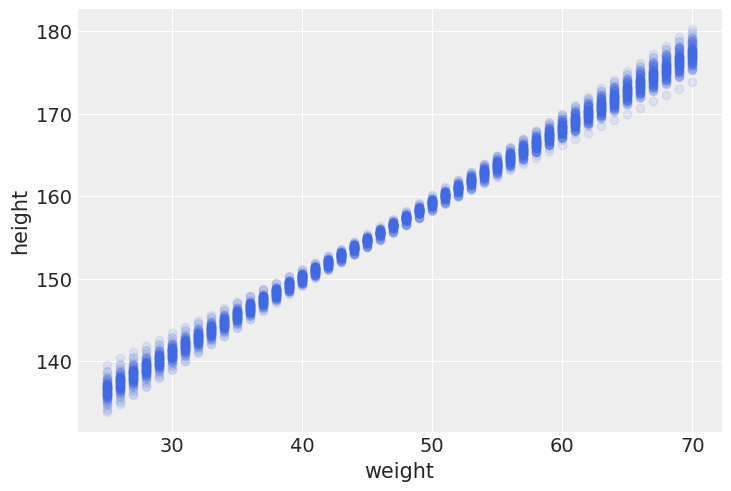

In [572]:
# Code 4.55
# use scatter_kwargs={"alpha": 0} to hide raw data
az.plot_pair(
    d2[["weight", "height"]].to_dict(orient="list"), scatter_kwargs={"alpha": 0}
)

# loop over samples and plot each mu value
for i in range(100):
    plt.plot(weight_seq, mu[i], "o", c="royalblue", alpha=0.1)

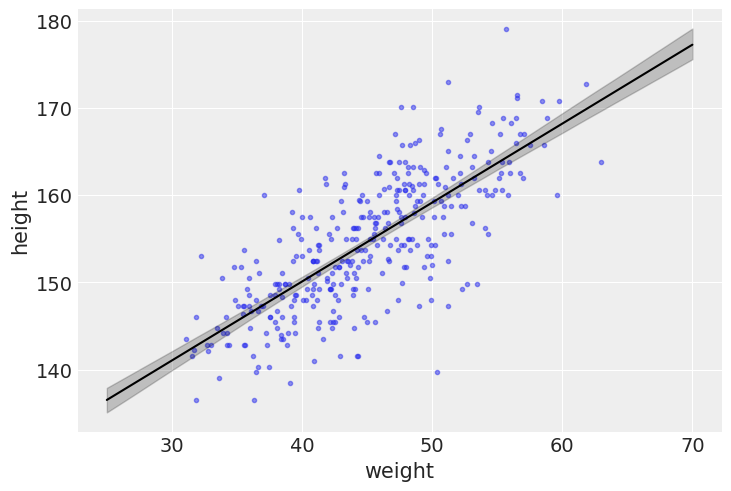

In [573]:
# Code 4.56 & 4.57
# summarize the distribution of mu
mu_mean = jnp.mean(mu, 0)
mu_PI = jnp.percentile(mu, q=jnp.array([5.5, 94.5]), axis=0)

# plot raw data
# fading out points to make line and interval more visible
az.plot_pair(
    d2[["weight", "height"]].to_dict(orient="list"), scatter_kwargs={"alpha": 0.5}
)

# plot the MAP line, aka the mean mu for each weight
plt.plot(weight_seq, mu_mean, "k")

# plot a shaded region for 89% PI
plt.fill_between(weight_seq, mu_PI[0], mu_PI[1], color="k", alpha=0.2)
plt.show()

In [598]:
# Code 4.58
post = m4_3.sample_posterior(reth2.rand(1), p4_3, (1000,))
mu_link = lambda weight: post["a"] + post["b"] * (weight - xbar)
weight_seq = jnp.arange(start=25, stop=71, step=1)
mu = vmap(mu_link)(weight_seq).T
mu_mean = jnp.mean(mu, 0)
mu_HPDI = reth2.hpdi(mu, prob=0.89, axis=0)

[136.51378 137.41948 138.3252  139.23091 140.13663 141.04234 141.94806
 142.85376 143.75948 144.66519 145.5709  146.47664 147.38235 148.28807
 149.19377 150.09947 151.00519 151.91092 152.81664 153.72235 154.62807
 155.53377 156.43948 157.34521 158.25092 159.15663 160.06235 160.96806
 161.87378 162.7795  163.68521 164.59093 165.49664 166.40236 167.30807
 168.21379 169.1195  170.02522 170.93094 171.83665 172.74236 173.64807
 174.55379 175.4595  176.36523 177.27095]


In [600]:
# Code 4.59
sim_height = reth2.Predictive(m4_3.model, post, return_sites=["height"])(reth2.rand(2), weight_seq, None)["height"]
sim_height.shape, sim_height[:5, 0].tolist()

((1000, 46), [135.8577117919922, 137.52162170410156, 133.89776611328125, 138.1460723876953, 131.16639709472656])

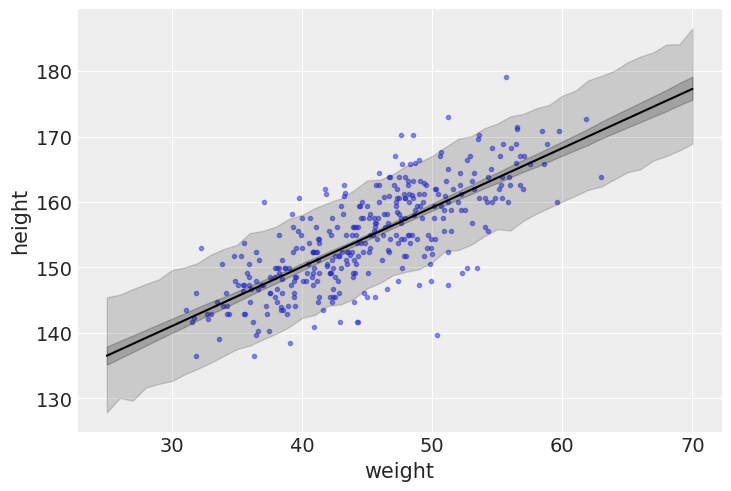

In [602]:
# Code 4.60
height_PI = jnp.percentile(sim_height, q=jnp.array([5.5, 94.5]), axis=0)

# Code 4.61
# plot raw data
az.plot_pair( d2[["weight", "height"]].to_dict(orient="list"), scatter_kwargs={"alpha": 0.5} )

# draw MAP line
plt.plot(weight_seq, mu_mean, "k")

# draw HPDI region for line
plt.fill_between(weight_seq, mu_HPDI[0], mu_HPDI[1], color="k", alpha=0.2)

# draw PI region for simulated heights
plt.fill_between(weight_seq, height_PI[0], height_PI[1], color="k", alpha=0.15)
plt.show()

In [605]:
# Code 4.62
post = m4_3.sample_posterior(reth2.rand(1), p4_3, sample_shape=(int(1e4),))
sim_height = reth2.Predictive(m4_3.model, post, return_sites=["height"])(reth2.rand(2), weight_seq, None)["height"]
print("height_PI:", jnp.percentile(sim_height, q=jnp.array([5.5, 94.5]), axis=0) )

height_PI: [[128.36302 129.3142  130.07198 130.98041 131.91649 132.87292 133.6932
  134.58665 135.5111  136.5259  137.25125 138.1983  139.13104 140.27205
  141.05574 142.06482 142.80031 143.73149 144.73135 145.49632 146.69487
  147.58    148.38373 149.35225 150.18643 150.7933  152.05566 152.68056
  153.72104 154.38188 155.6794  156.31795 157.34576 158.11879 158.85207
  159.95908 160.78612 161.7753  162.70953 163.58353 164.6315  165.28749
  166.3263  167.13928 167.95323 169.00629]
 [144.8077  145.5992  146.51524 147.30098 148.28566 149.22876 149.97429
  151.11748 152.0345  152.80379 153.75569 154.65256 155.66904 156.511
  157.36989 158.45767 158.91646 160.17903 160.8509  161.87372 162.65701
  163.64001 164.84123 165.57655 166.53337 167.14929 168.10481 169.10318
  170.16814 170.91388 171.80562 172.68565 173.80646 174.70753 175.53838
  176.24828 177.24995 178.10172 178.99767 180.0048  181.16489 182.07378
  182.72418 183.78012 184.549   185.42188]]


In [608]:
# Code 4.63
post = m4_3.sample_posterior(reth2.rand(1), p4_3, (1000,))
weight_seq = jnp.arange(25, 71)
sim_height = vmap(
    lambda i, weight: dist.Normal(post["a"] + post["b"] * (weight - xbar), post["sigma"]).sample(reth2.rand(i))
)(jnp.arange(len(weight_seq)), weight_seq).T
print("height_PI:", jnp.percentile(sim_height, q=jnp.array([5.5, 94.5]), axis=0))

height_PI: [[128.51714 128.93176 129.87407 131.03271 131.91757 133.1299  133.29356
  134.9178  135.69533 136.87076 137.34816 138.14384 138.95856 139.96884
  140.876   142.15967 142.65277 143.3409  144.79645 145.37306 147.18253
  147.31609 148.17764 149.20921 150.26399 151.08554 151.73326 152.43292
  153.63368 154.45398 155.53107 156.66412 156.89394 158.4298  159.00322
  160.3898  160.56413 162.1453  162.53047 163.25993 164.66006 164.81505
  166.14296 167.63686 168.00255 169.19228]
 [144.52873 144.86954 146.67195 147.18083 148.57222 148.67586 150.05809
  150.63222 151.73093 153.1334  153.70547 155.0919  156.26097 156.12971
  157.86394 158.11307 159.23247 160.27411 160.35541 162.24193 162.50356
  163.37033 164.72563 165.3401  166.63293 167.90778 167.99016 169.0812
  169.67749 170.59282 171.84267 172.84271 173.47154 174.70332 175.71187
  177.24591 177.28853 178.61581 179.15285 179.92755 180.7536  181.48807
  182.90387 183.75574 184.77681 185.35512]]


## 4.5 Curves from lines

In [414]:
help(jnp.stack)

Help on function stack in module jax._src.numpy.lax_numpy:

stack(arrays, axis: int = 0, out=None)
    Join a sequence of arrays along a new axis.
    
    LAX-backend implementation of :func:`stack`.
    
    *Original docstring below.*
    
    The ``axis`` parameter specifies the index of the new axis in the
    dimensions of the result. For example, if ``axis=0`` it will be the first
    dimension and if ``axis=-1`` it will be the last dimension.
    
    .. versionadded:: 1.10.0
    
    Parameters
    ----------
    arrays : sequence of array_like
        Each array must have the same shape.
    axis : int, optional
        The axis in the result array along which the input arrays are stacked.
    
    Returns
    -------
    stacked : ndarray
        The stacked array has one more dimension than the input arrays.



In [596]:
import importlib
importlib.reload(reth2)

<module 'reth2' from '/home/nbooks/stats-rethinking2/reth2.py'>